## General Observations of the Properties of SNe-heated Gas Particles
`-- Leo Lonzarich, September 23 2021 --`

### Table of Contents
- [Comparing SNe Gas to Other Gas](#compare)
- [Radial Velocity](#radvelocity)
- [Mass Across Halos](#mass)
- [Physical Distribution](#distribution)

In [1]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt

In [2]:
# fetching simulation 

h148 = pynbody.load('../h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200bkgdens/h148.cosmo50PLK.3072g3HbwK1BH.004096')
h229 = pynbody.load('../h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
h242 = pynbody.load('../h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
h329 = pynbody.load('../h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

In [3]:
# halo numbers for halos with stars in them and fMhires > 0.9 [updated 09-08-21]

nums_h148 = [1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 21, 24, 27, 28, 30, 32, 36, 37, 41, 45, 47, 48, 58, 61, 65, 68, 80, 81, 96, 105, 119, 127, 128, 136, 163, 212, 265, 278, 283, 329, 372, 377, 384, 386, 442, 491, 620, 678, 699, 711, 759, 914, 1004, 1024, 1201, 1217, 1451, 2905, 5039]
nums_h229 = [1, 2, 5, 7, 17, 20, 22, 23, 27, 29, 33, 52, 53, 55, 59, 61, 62, 73, 104, 113, 139, 212, 290, 549, 1047, 1374, 1483, 1558, 6045]
nums_h242 = [1, 10, 12, 24, 30, 34, 40, 41, 44, 48, 49, 71, 78, 80, 86, 165, 223, 439, 480, 1872, 2885, 6054, 9380, 10426, 12297]
nums_h329 = [1, 11, 31, 33, 40, 64, 103, 133, 137, 146, 185, 447, 729, 996, 1509]

## Treating h148: 
_______________
_______________

### Comparing SNe Gas to Other Gas  <a class="anchor" id="compare"></a>

### Radial Velocity <a class="anchor" id="radvelocity"></a>

Centering on a halo, particle velocities are normalized such that the magnitudes of the vx, vy, and vz components together give the radial velocity for the particles.

In [4]:
h148.gas.loadable_keys();

In [5]:
# setting the halo we want to study

n = 1

# pulling out a halo from simulation
h_h148 = h148.halos() 
halon = h_h148[nums_h148[n]]

# unpacking, centering on desired halo.
pynbody.analysis.halo.center(halon, mode='com', vel=True)

In [6]:
# computing radial velocity key for halo n.
halon['v_r'] = np.sum(halon['pos']*halon['vel'], axis=1)/np.sqrt(np.sum(halon['pos']*halon['pos'], axis=1))

In [9]:
heated['pos']

SimArray([[ 1.40680994e-04,  1.93620287e-05,  2.21404793e-04],
          [ 9.55272164e-05, -6.12437073e-05, -5.16999637e-05],
          [-1.69151865e-04,  3.11999581e-06,  8.06884716e-05],
          ...,
          [-4.76543162e-05,  3.68479593e-05,  1.87465536e-04],
          [ 9.83961556e-05, -3.64030060e-05, -2.62205803e-06],
          [ 2.54237722e-05, -1.29344920e-05,  8.81781677e-05]], '5.00e+04 kpc a')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [7]:
# selecting those gas particles in the simulation still affected by SN heating.
simtime = h148.properties['time']
heated = halon[pynbody.filt.HighPass('coolontime', simtime)];

# picking out the velocities of normal and hot gas in the halo.
hvel = halon['vel'] 
hvel_hot = heated['vel']

def norm(x):
    '''
    Overview:
        Takes the rudementary norm of the rows of arrays. Quicker than computation via linalg.norm.
    
    Inputs:
    -> 'x', array-like.
    
    Output:
    -> 1xn array with each column entry representing the norm of the row of equivalent index.
    '''
    #-----------------------------#
    
    return np.sum(np.abs(x)**2,axis=-1)**(1./2)


rvel = norm(hvel)
rvel_hot = norm(hvel_hot)

# scaling number of gas particles to compare with heated gas.
rvel_ref = np.random.choice(rvel, size=20000, replace=False)

In [8]:
# pulling random selection of gas particles for analysis
ints = np.linspace(0,len(halon.g), len(halon.g), endpoint=False)
selection = (np.random.choice(ints, size=20000, replace=False)).astype(int)

print(selection.astype(int))
hselect = halon.g[selection]


[ 89807  55558 187260 ... 263615  60528 293971]


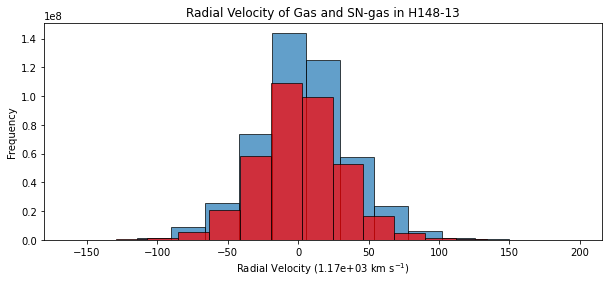

In [9]:
bins = 15 # setting # of bins.

plt.figure(figsize=(10,4))
plt.title('Radial Velocity of Gas and SN-gas in H148-13',fontsize=12)
plt.xlabel('Radial Velocity (1.17e+03 km s$^{-1}$)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.hist(hselect['v_r'].in_units('km s^-1'), bins, alpha=0.7, weights=hselect['mass'].in_units('Msol'), histtype='bar', ec='black')
plt.hist(heated['v_r'].in_units('km s^-1'), bins, alpha=0.7, histtype='bar', weights=heated['mass'].in_units('Msol'), ec='black', color='red')


plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 

### Mass Across Halos <a class="anchor" id="mass"></a>

We start out here by finding the mass of those gas particles heated by supernovae, then compare these masses to those of particles to all particles in the halo, and those that are cooled (i.e., those that have temperatures less than $10^4$ Kelvin).

In [10]:
cooled = halon.g[pynbody.filt.LowPass('temp', 10**4)] # consolidating all cooled gas particles.

# pulling random selection of cooled particles
ints = np.linspace(0,len(cooled), len(cooled), endpoint=False)
selection = (np.random.choice(ints, size=20000, replace=False)).astype(int)
coolSelect = cooled[selection]


gasMass = hselect['mass'] # getting masses for the random selection of particles previously obtained.
coolMass = coolSelect['mass']# masses for selection of cold gas
simtime = h148.properties['time']
hotMass = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['mass'] # callable for mass of heated gas.

# len(totGas), len(coolGas), len(hotGas)

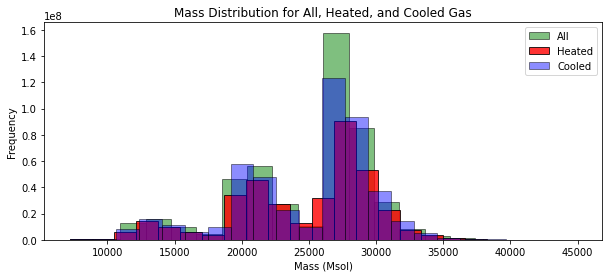

In [11]:
bins = 20

# Comparing distribution of masses for different particle types.
plt.figure(figsize=(10,4))
plt.title('Mass Distribution for All, Heated, and Cooled Gas',fontsize=12)
plt.xlabel('Mass (Msol)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.hist(gasMass.in_units('Msol'), bins, alpha=0.5, weights=gasMass.in_units('Msol'), histtype='bar', ec='black', color='green', label='All')
plt.hist(hotMass.in_units('Msol'), bins, alpha=0.8, weights=hotMass.in_units('Msol'), histtype='bar', ec='black', color='red', label='Heated')
plt.hist(coolMass.in_units('Msol'), bins, alpha=0.45, weights=coolMass.in_units('Msol'), histtype='bar', ec='black', color='blue', label='Cooled')


plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 

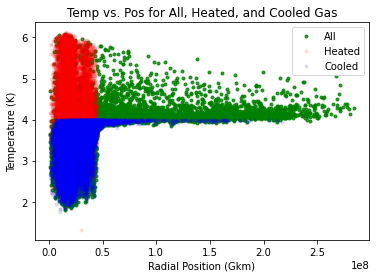

In [16]:
# computing radial velocity key for halo n.
#halon['pos_r'] = np.sum(halon['pos']*halon['vel'], axis=1)/np.sqrt(np.sum(halon['pos']*halon['pos'], axis=1))


# Comparing distribution of masses for different particle types.
plt.figure(figsize=(6,4))
plt.title('Temp vs. Pos for All, Heated, and Cooled Gas',fontsize=12)
plt.xlabel('Radial Position (Gkm)', fontsize=10)
plt.ylabel('Temperature (K)',fontsize=10)
plt.plot(norm(hselect['pos'].in_units('10e9 km')), np.log10(hselect['temp']), '.', alpha=0.8, color='green',\
         label='All')
plt.plot(norm(heated['pos'].in_units('10e9 km')), np.log10(heated.g['temp']), '.', alpha=0.1, color='red',\
         label='Heated')
plt.plot(norm(coolSelect['pos'].in_units('10e9 km')), np.log10(coolSelect['temp']), '.', alpha=0.1, color='blue',\
         label='Cooled')


plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 


### Physical Distributions <a class="anchor" id="distribution"></a>

Radial locations of particles \[\# of gas particles < halo radius vs. radius\]

In [13]:
h148.gas.keys()

['mass',
 'rho',
 'vz',
 'x',
 'eps',
 'v_r',
 'pos',
 'phi',
 'metals',
 'vy',
 'vx',
 'vel',
 'coolontime',
 'z',
 'temp',
 'y']

In [14]:
# radial positions of total, cool, and hot gas.

totPos = halon.gas['pos'] # cartesian position for all gas particles.
totRad = norm(totPos) # converting cartesian to radial (quicker than linalg).

totRad = np.random.choice(totRad, size=20000, replace=False)

coolPos = halon.gas[pynbody.filt.LowPass('temp', 10**4)]['pos']
coolRad = norm(coolPos)

coolRad = np.random.choice(coolRad, size=20000, replace=False)

hotPos = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['pos']
hotRad = norm(hotPos)



def radial_stack(pos, num=20):
    '''
    Overview:
        Accruing the number of particles within radial sudivisions of a halo.
    
    Inputs:
    -> 'pos', array-like containing radial positions of particles of a centered halo.
    -> 'num', number of slices.
    
    Output:
    -> 'stack', array specifying the number of particles within a given radius of a halo.
    '''
    #-----------------------------#
    
    # initializing array, setting equally spaced radial distances
    stack = np.array([np.linspace(0, np.max(pos), num), np.zeros(num)])
    
    for i in range(0, num):
        for j in range(0, len(pos)):
            if pos[j] < stack[0,i]:
                stack[1,i] += 1
                
    return stack


# distribution of respective gas particles radially from halo center.
slices= 50
tot_dist = radial_stack(totRad, slices) 
cool_dist = radial_stack(coolRad, slices)
hot_dist = radial_stack(hotRad, slices)

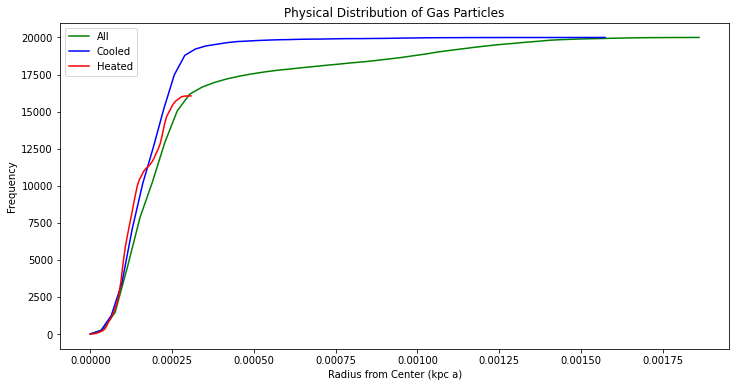

In [15]:
plt.figure(figsize=(12,6))
plt.title('Physical Distribution of Gas Particles',fontsize=12)
plt.xlabel('Radius from Center (kpc a)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.plot(tot_dist[0], tot_dist[1],color='green', label='All')
plt.plot(cool_dist[0], cool_dist[1], color='blue', label='Cooled')
plt.plot(hot_dist[0], hot_dist[1], color='red', label='Heated')

plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 
